# Regresión Lineal

## Introducción

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es “dibujar una recta” que nos indicará la tendencia de un conjunto de datos continuos 


![title](regresionlineal.jpg)

## Historia 

[Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) 

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,1​ y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.2​ La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.


## El planteamiento del problema

Se tiene en investigación experimental como objetivo determinar uan relación funciona entre una variable respuesta Y y un conjunto de variables controladas $X_1$,....,$X_k$. Y se asume que es continua (aunque no necesariamente) y las $X_i's$ variables no aleatorias, las cuales pueden ser controladas o determinadas por el experimentador.

En general, la relación entre Y y ($X_1$,....,$X_k$) es desconocida por se puede postular una relación de la forma

$$Y_i=\beta_0+\sum_{j=1}^{k}\beta_{j}X_{j}+e_i$$

Escribiendo de forma matricial tenemos que 

$$Y=X\beta +e$$

Donde $\beta=(\beta_0,...,\beta_k)^t$ es el vector de par+ametros desconocidos pero fijos, e error exprimental, bajo estas condiciones la ecuación anterior se le conoce como un modelo de regresión multiple y si k=1 se le conoce como modelo de regresión simple

En el modelo considerado anteriormente es de tal forma que $X=X_p$ (p=k+1) es de rango completo $r(X)=min\{n,p\}$ y adicionalmente, se supone que $\mu=E(Y)=X\beta$. En este caso no se necesita ningún supuesto sobre Y. Por minimos cuadrados ordinarios (MCO), se busca minimizar

$$e^te=Q(\beta)=||Y-X\beta||^2$$
$$=Y^tY-\beta^tX^tY-Y^tX\beta+B^tX^tX\beta$$
$$=Y^tY-2\beta^tX^tY+\beta^tX^tX\beta$$

La filosofia de los MCO, es hallar un estimador de $\beta$, tal que el tamaño de los errores sea mínimo, es decir, minimizar los errores. Entonces al derivar e igual a cero, se obtiene 

$$\frac{\partial Q(\beta)}{\partial \beta}=-2X^tY+2X^tX\beta$$
$$X^tX\beta=X^tY$$

las cuales son conocidas como las ecuaciones normales (EN)

Por ser $((r(X))=r(X^tX)=p$, entonces existe $(X^tX)^{-1}$ la cual es única; por tanto, la solución MCO para $\beta$ es 

$$\hat{\beta}=(X^tX)^{-1}X^tY$$

y claramente con este vector se minimiza Q(B) puesto que $\frac{\partial}{\partial \beta^t}[\frac{\partial}{\partial \beta}Q(\beta)]=2X^tX$

## Desarrollo un ejemplo de regresión lineal, con datos reales.

En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no, se quiere comparar el numero de propinas en función de total_bill

In [12]:
import numpy as np
from seaborn import load_dataset
from seaborn import lmplot
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Leemos el archivo csv, que tiene información acerca de:
En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no..

In [13]:
data = load_dataset("tips")
data=pd.DataFrame(data)
#veamos cuantas dimensiones y registros contiene
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Veamos esas primeras filas:

In [14]:
#son 245 registros con 8 columnas. Veamos los primeros registros
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.

Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [15]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["total_bill"]]
X_train = np.array(dataX)
y_train =data["tip"]
f=len(X_train)
g=len(y_train)
print(f,g)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

244 244
Coefficients: 
 [0.10502452]
Independent term: 
 0.9202696135546731
Mean squared error: 1.04
Variance score: 0.46


y=0.10502452x+0.9202696135546731

c:\users\andres\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


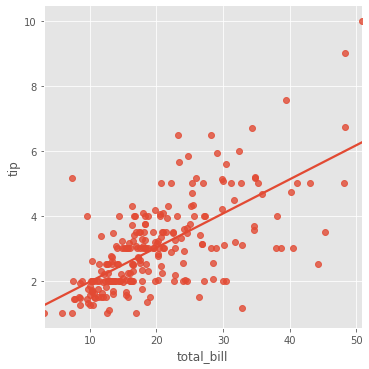

In [16]:
lmplot('total_bill','tip', data=data, ci=None)

## Conclusiones

El modelo de regresión lineal es de los mas simples de implementar y de faciles de computar, de esta manera librerias como sklearn en Python han desarrollado herramientras que permiten hacer el modelamimento de manera rapida, sencilla y de manera adecuada. La ecuacion del modelo anterior puede ser descrita como y=0.10502452x+0.9202696135546731 con un error cuadratico medio de 1.04, según este modelo a mayor pago, mayor sera la propina.